In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy import signal
plt.style.use('science')
plt.style.use('nature')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('default')
plt.style.use('science')
plt.style.use('notebook')
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *

In [4]:
results = pd.read_csv('results.csv', comment = ";")
results

,Star,Type,Teff,A(N),dA(N),A(O),dA(O),A(C),dA(C),oisorat,...,oisorat_high,18Orat,18Orat_low,18Orat_high,[Fe],[Mg],[Na],[Ca],[S],[Si]
0,HD 137613,dlHdC,5500,9.238,0.062,8.723,0.083,9.860,0.12,0.52,...,0.14,0.6600,-0.0550,0.0530,-0.19,0.43,0.32,-0.22,-0.19,-0.38
1,HD 182040,dlHdC,5750,9.084,0.081,7.993,0.063,9.895,0.13,0.58,...,0.35,0.6340,-0.1160,0.1160,-0.45,0.17,-0.02,-0.40,-0.15,-0.21
2,C38,dlHdC,5750,9.469,0.084,8.989,0.095,10.320,0.16,0.73,...,0.26,0.5770,-0.0760,0.0780,0.23,0.74,0.62,0.04,0.18,0.20
3,A223,dlHdC,6250,8.730,0.094,8.195,0.093,9.480,0.24,0.52,...,0.24,0.6350,0.0850,0.0830,-0.78,-0.12,-0.12,-0.78,-0.38,-0.65
4,B566,dlHdC,5750,9.089,0.102,8.550,0.103,10.026,0.25,0.78,...,0.32,0.5610,-0.0850,0.0820,-0.29,0.02,0.02,-0.52,-0.10,0.33
5,B42,dlHdC,5500,9.175,0.141,8.806,0.097,10.165,0.14,0.32,...,0.28,0.7610,-0.1380,0.0890,-0.31,0.34,0.29,0.06,-0.10,0.03
6,ASAS-RCB-21,RCB,5000,7.736,0.086,7.767,0.162,8.860,0.06,6.85,...,2.30,0.1280,-0.0310,0.0360,-0.92,-1.37,-1.18,-1.11,-0.61,-1.11
7,NSV11154,RCB,5250,7.454,0.151,7.193,0.097,8.900,0.06,7.18,...,6.38,0.1230,-0.0540,0.0630,-0.80,-1.20,-1.56,-1.54,-0.12,-0.83
8,AO Her,RCB,4750,6.949,0.111,7.763,0.136,8.950,0.05,69.03,...,227.74,0.0145,-0.0113,0.0139,-1.03,-1.28,-1.52,-1.74,-0.33,-0.14
9,WISE J1942+,RCB,4500,6.590,0.130,7.420,0.100,8.720,0.06,92.93,...,500.00,0.0105,-0.0105,0.0154,-0.92,-1.23,-1.75,-1.56,0.01,-0.57


In [5]:
teffs = results['Teff']
types = results['Type']
names = results['Star']

In [6]:
cs = ['#FF7F0E' if typ == "RCB" else '#1F77B4' for typ in types]
labels = ['RCB' if typ == "RCB" else 'dLHdC' for typ in types]

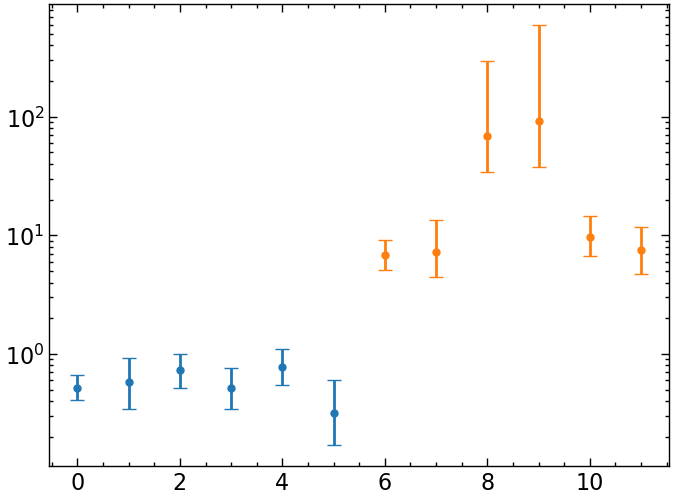

In [7]:
oisorats = results['oisorat'].values
oisorat_errs = [np.abs(results['oisorat_low'].values), results['oisorat_high'].values]
xs = np.arange(len(oisorats))
# plt.plot(xs, oisorats, 'o')
for i in range(len(oisorats)):
    plt.errorbar(xs[i], oisorats[i], yerr=[[oisorat_errs[0][i]], [oisorat_errs[1][i]]], fmt='o', capsize=5, ms=5, color=cs[i])
plt.yscale('log')

In [8]:
results_mod = results.copy()
results_mod

,Star,Type,Teff,A(N),dA(N),A(O),dA(O),A(C),dA(C),oisorat,...,oisorat_high,18Orat,18Orat_low,18Orat_high,[Fe],[Mg],[Na],[Ca],[S],[Si]
0,HD 137613,dlHdC,5500,9.238,0.062,8.723,0.083,9.860,0.12,0.52,...,0.14,0.6600,-0.0550,0.0530,-0.19,0.43,0.32,-0.22,-0.19,-0.38
1,HD 182040,dlHdC,5750,9.084,0.081,7.993,0.063,9.895,0.13,0.58,...,0.35,0.6340,-0.1160,0.1160,-0.45,0.17,-0.02,-0.40,-0.15,-0.21
2,C38,dlHdC,5750,9.469,0.084,8.989,0.095,10.320,0.16,0.73,...,0.26,0.5770,-0.0760,0.0780,0.23,0.74,0.62,0.04,0.18,0.20
3,A223,dlHdC,6250,8.730,0.094,8.195,0.093,9.480,0.24,0.52,...,0.24,0.6350,0.0850,0.0830,-0.78,-0.12,-0.12,-0.78,-0.38,-0.65
4,B566,dlHdC,5750,9.089,0.102,8.550,0.103,10.026,0.25,0.78,...,0.32,0.5610,-0.0850,0.0820,-0.29,0.02,0.02,-0.52,-0.10,0.33
5,B42,dlHdC,5500,9.175,0.141,8.806,0.097,10.165,0.14,0.32,...,0.28,0.7610,-0.1380,0.0890,-0.31,0.34,0.29,0.06,-0.10,0.03
6,ASAS-RCB-21,RCB,5000,7.736,0.086,7.767,0.162,8.860,0.06,6.85,...,2.30,0.1280,-0.0310,0.0360,-0.92,-1.37,-1.18,-1.11,-0.61,-1.11
7,NSV11154,RCB,5250,7.454,0.151,7.193,0.097,8.900,0.06,7.18,...,6.38,0.1230,-0.0540,0.0630,-0.80,-1.20,-1.56,-1.54,-0.12,-0.83
8,AO Her,RCB,4750,6.949,0.111,7.763,0.136,8.950,0.05,69.03,...,227.74,0.0145,-0.0113,0.0139,-1.03,-1.28,-1.52,-1.74,-0.33,-0.14
9,WISE J1942+,RCB,4500,6.590,0.130,7.420,0.100,8.720,0.06,92.93,...,500.00,0.0105,-0.0105,0.0154,-0.92,-1.23,-1.75,-1.56,0.01,-0.57


In [9]:
teffs = results_mod['Teff']
types = results_mod['Type']
names = results_mod['Star']

In [10]:
teffs.iloc[4] -= 50
teffs.iloc[1] += 50
teffs.iloc[-2] += 50
teffs.iloc[-1] -= 50
teffs.iloc[0] -= 50
teffs.iloc[5] +=50

/tmp/ipykernel_1286661/3123057099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teffs.iloc[4] -= 50
/tmp/ipykernel_1286661/3123057099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teffs.iloc[1] += 50
/tmp/ipykernel_1286661/3123057099.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teffs.iloc[-2] += 50
/tmp/ipykernel_1286661/3123057099.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [11]:
# plt.style.use('science')
# plt.style.use('nature')

In [12]:
props = pd.read_csv("./hdc_model_properties.csv")
np.max(props['16O/18O'])

np.float64(198.4)

In [13]:
logteffmodel = props['log(TeffHdC)']
teffmodel = 10**logteffmodel
ratmodel = props['16O/18O']
massmodel = props['Mtotal']
qmodel = props['q']

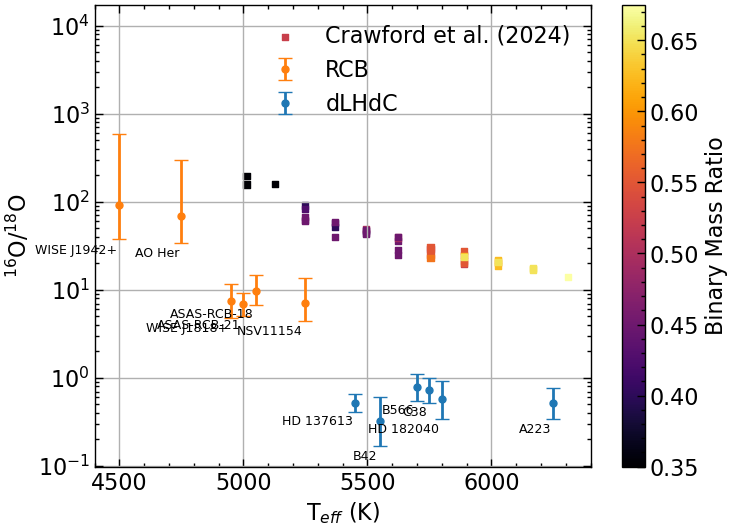

In [14]:
oisorats = results['oisorat'].values
oisorat_errs = [np.abs(results['oisorat_low'].values), results['oisorat_high'].values]
xs = np.arange(len(oisorats))
# plt.plot(teffs, oisorats, 'o')

unique_teffs, counts = np.unique(teffs, return_counts=True)
teffs2 = teffs.copy()
i = 1
# set random seed
np.random.seed(42705)
for teff in unique_teffs[counts > 1]:
    indices = np.where(teffs == teff)[0]
    print(len(indices))
    n = len(indices)
    alternating_array = np.tile([1, -1], n // 2 + 1)[:n]
    shifts = np.random.uniform(-50, 50, size=len(indices))
    # teffs2[indices] += alternating_array*50
    teffs2[indices] += shifts*0
    i *= -1
# plt.errorbar(teffs, oisorats, yerr=oisorat_errs, fmt='o', c = 'k', capsize = 5, ms = 5)
plt.figure(figsize=(8, 6))
for i in range(len(oisorats)):
    plt.text(teffs2[i]-10, 0.95*oisorats[i]-oisorat_errs[0][i], names[i], fontsize=9, ha='right', va='top')
    plt.errorbar(teffs2[i], oisorats[i], yerr=[[oisorat_errs[0][i]], [oisorat_errs[1][i]]], fmt='o', capsize=5, ms=5, color=cs[i])
    
plt.yscale('log')
# plt.axhline(1, c='k', ls='--')
plt.scatter(teffmodel, ratmodel, c=qmodel, s=20, label = "Crawford et al. (2024)", marker = 's', cmap = 'inferno')
plt.colorbar(label = "Binary Mass Ratio")

plt.errorbar(9000, 10000, yerr=[[oisorat_errs[0][i]], [oisorat_errs[1][i]]], fmt='o', capsize=5, ms=5, color="#FF7F0E", label = "RCB")
plt.errorbar(9000, 10000, yerr=[[oisorat_errs[0][i]], [oisorat_errs[1][i]]], fmt='o', capsize=5, ms=5, color="#1F77B4", label = "dLHdC")


plt.xlim(4400, 6400)
plt.xlabel(r"T$_{eff}$ (K)")
plt.ylabel(r"$^{16}$O/$^{18}$O")
# plt.scatter(teffmodel-500, ratmodel/2.7, c='k', s=10, label = "Model predictions (T-500, rat/2.7)")
plt.grid()
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())
# plt.savefig("./plots/teff-v-ratio.pdf", bbox_inches='tight', dpi=300)
# plt.savefig("/media/advait/DATA/research/rcb-project/code/6692b5c2905d9ab9e6c1d723/images/teff-v-ratio2.pdf", dpi=300)
# plt.show()
plt.legend()


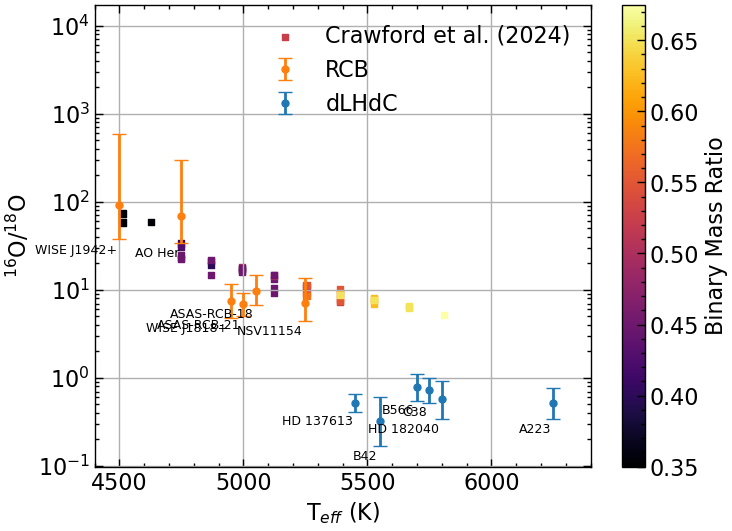

In [15]:
oisorats = results['oisorat'].values
oisorat_errs = [np.abs(results['oisorat_low'].values), results['oisorat_high'].values]
xs = np.arange(len(oisorats))
# plt.plot(teffs, oisorats, 'o')

unique_teffs, counts = np.unique(teffs, return_counts=True)
teffs2 = teffs.copy()
i = 1
# set random seed
np.random.seed(42705)
for teff in unique_teffs[counts > 1]:
    indices = np.where(teffs == teff)[0]
    print(len(indices))
    n = len(indices)
    alternating_array = np.tile([1, -1], n // 2 + 1)[:n]
    shifts = np.random.uniform(-50, 50, size=len(indices))
    # teffs2[indices] += alternating_array*50
    teffs2[indices] += shifts*0
    i *= -1
# plt.errorbar(teffs, oisorats, yerr=oisorat_errs, fmt='o', c = 'k', capsize = 5, ms = 5)
plt.figure(figsize=(8, 6))
for i in range(len(oisorats)):
    plt.text(teffs2[i]-10, 0.95*oisorats[i]-oisorat_errs[0][i], names[i], fontsize=9, ha='right', va='top')
    plt.errorbar(teffs2[i], oisorats[i], yerr=[[oisorat_errs[0][i]], [oisorat_errs[1][i]]], fmt='o', capsize=5, ms=5, color=cs[i])
    
plt.yscale('log')
# plt.axhline(1, c='k', ls='--')
plt.scatter(teffmodel-500, ratmodel/2.7, c=qmodel, s=20, label = "Crawford et al. (2024)", marker = 's', cmap = 'inferno')
plt.colorbar(label = "Binary Mass Ratio")

plt.errorbar(9000, 10000, yerr=[[oisorat_errs[0][i]], [oisorat_errs[1][i]]], fmt='o', capsize=5, ms=5, color="#FF7F0E", label = "RCB")
plt.errorbar(9000, 10000, yerr=[[oisorat_errs[0][i]], [oisorat_errs[1][i]]], fmt='o', capsize=5, ms=5, color="#1F77B4", label = "dLHdC")


plt.xlim(4400, 6400)
plt.xlabel(r"T$_{eff}$ (K)")
plt.ylabel(r"$^{16}$O/$^{18}$O")
# plt.scatter(teffmodel-500, ratmodel/2.7, c='k', s=10, label = "Model predictions (T-500, rat/2.7)")
plt.grid()
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())
# plt.savefig("./plots/teff-v-ratio.pdf", bbox_inches='tight', dpi=300)
# plt.savefig("/media/advait/DATA/research/rcb-project/code/6692b5c2905d9ab9e6c1d723/images/teff-v-ratio2.pdf", dpi=300)
# plt.show()
plt.legend()


In [16]:
ACs = results['A(C)'].values
dACs = results['dA(C)'].values
ANs = results['A(N)'].values
dANs = results['dA(N)'].values
AOs = results['A(O)'].values
dAOs = results['dA(O)'].values

xFes = results['[Fe]'].values
AFes = xFes + solar_abundances['Fe']

o18rats = results['18Orat'].values
o18rat_errs = [(np.abs(results['18Orat_low'].values), results['18Orat_high'].values)]
o18rat_errs = [np.mean(o18rat_errs[i], axis=0) for i in range(len(o18rat_errs))][0]
o18rat_errs

array([0.054  , 0.116  , 0.077  , 0.084  , 0.0835 , 0.1135 , 0.0335 ,
       0.0585 , 0.0126 , 0.01295, 0.033  , 0.048  ])

In [17]:
import pandas as pd
mun = pd.read_csv("./munson_table.csv", sep='\t')
munco = mun['C/O'].values
munrat = mun['^16O/^18O'].values
overshoot = mun['overshoot_f'].values
initH = mun['Initial ^1H'].values
mets = mun['Metallicity'].values

In [18]:
cms = ['xkcd:green' if met == "Solar" else 'xkcd:red' for met in mets]

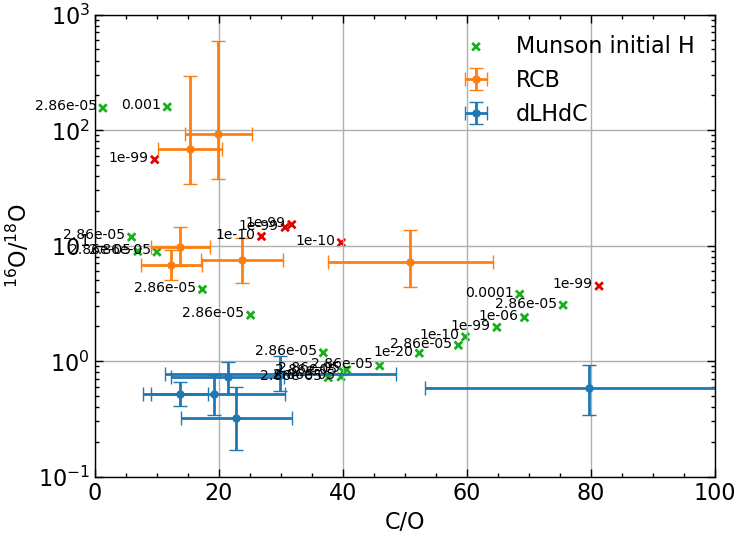

In [19]:
CO = ACs-AOs
dACOs = np.sqrt(dACs**2+dAOs**2)
dCO = np.log(10)*10**CO*dACOs

plt.scatter(munco, munrat, c=cms, s=30, marker = 'x', label = "Munson initial H")
for i in range(len(munco)):
    if munco[i] < 100 and munrat[i] < 2e2:
        plt.text(munco[i]-1, munrat[i]*1.2, f"{initH[i]}", fontsize=10, ha='right', va='top')

for i in range(len(oisorats)):
    # plt.text(teffs2[i]+10, oisorats[i]*1.9, names[i], fontsize=8, ha='left', va='top')
    plt.errorbar(10**CO[i], oisorats[i], yerr=[[oisorat_errs[0][i]], [oisorat_errs[1][i]]], xerr = dCO[i], fmt='o', capsize=5, ms=5, color=cs[i])
    # plt.text(10**CO[i]*1.1, oisorats[i]*1.9, names[i], fontsize=8, ha='left', va='top')
    
# plt.yscale('log')
# plt.axhline(1, c='k', ls='--')
plt.ylim(1e-1, 1000)
plt.xlim(0,100 )

        # plt.text(munco[i]-1, munrat[i]*1.2, f"{overshoot[i]}", fontsize=8, ha='right', va='top')
plt.errorbar(9000, 10000, yerr=1, xerr = 1, fmt='o', capsize=5, ms=5, color="#FF7F0E", label = "RCB")
plt.errorbar(9000, 10000, yerr=1, xerr = 1, fmt='o', capsize=5, ms=5, color="#1F77B4", label = "dLHdC")
plt.yscale('log')
plt.xlabel(r"C/O")
plt.ylabel(r"$^{16}$O/$^{18}$O")
plt.legend()
# plt.scatter(teffmodel, ratmodel, c='k', s=10, label = "Model predictions (T-500, rat/2.7)")
plt.grid()

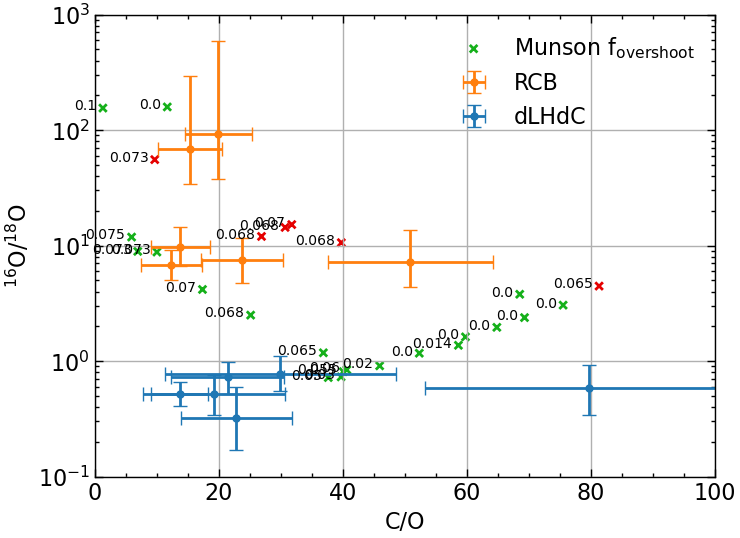

In [20]:
CO = ACs-AOs
dACOs = np.sqrt(dACs**2+dAOs**2)
dCO = np.log(10)*10**CO*dACOs

plt.scatter(munco, munrat, c=cms, s=30, marker = 'x', label = r"Munson f$_\text{overshoot}$")
for i in range(len(munco)):
    if munco[i] < 100 and munrat[i] < 2e2:
        plt.text(munco[i]-1, munrat[i]*1.2, f"{overshoot[i]}", fontsize=10, ha='right', va='top')

for i in range(len(oisorats)):
    # plt.text(teffs2[i]+10, oisorats[i]*1.9, names[i], fontsize=8, ha='left', va='top')
    plt.errorbar(10**CO[i], oisorats[i], yerr=[[oisorat_errs[0][i]], [oisorat_errs[1][i]]], xerr = dCO[i], fmt='o', capsize=5, ms=5, color=cs[i])
    # plt.text(10**CO[i]*1.1, oisorats[i]*1.9, names[i], fontsize=8, ha='left', va='top')
    
# plt.yscale('log')
# plt.axhline(1, c='k', ls='--')
plt.ylim(1e-1, 1000)
plt.xlim(0,100 )

        # plt.text(munco[i]-1, munrat[i]*1.2, f"{overshoot[i]}", fontsize=8, ha='right', va='top')
plt.errorbar(9000, 10000, yerr=1, xerr = 1, fmt='o', capsize=5, ms=5, color="#FF7F0E", label = "RCB")
plt.errorbar(9000, 10000, yerr=1, xerr = 1, fmt='o', capsize=5, ms=5, color="#1F77B4", label = "dLHdC")
plt.yscale('log')
plt.xlabel(r"C/O")
plt.ylabel(r"$^{16}$O/$^{18}$O")
plt.legend()
# plt.scatter(teffmodel, ratmodel, c='k', s=10, label = "Model predictions (T-500, rat/2.7)")
plt.grid()

HD 137613 13.708817661648494 4.605675328927439
HD 182040 79.79946872679753 26.544008529114638
C38 21.428906011200564 9.181435333166032
A223 19.275249131909366 11.423662195753987
B566 29.92264636608183 18.629496205013275
B42 22.8559880337543 8.96359173971
ASAS-RCB-21 12.387965865303665 4.927699369004241
NSV11154 50.93308710571963 13.376350669345594
AO Her 15.381546403030326 5.13196836687265
WISE J1942+ 19.95262314968883 5.357783283450978
ASAS-RCB-18 13.803842646028867 4.725108936538289
WISE J1818+ 23.823194693586938 6.633819125419496


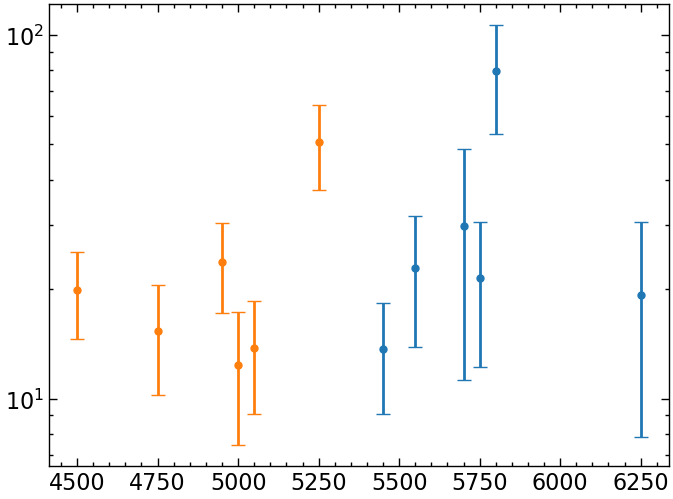

In [42]:
CO = ACs-AOs
dACOs = np.sqrt(dACs**2+dAOs**2)
dCO = np.log(10)*10**CO*dACOs

for i in range(len(oisorats)):
    # plt.text(teffs2[i]+10, oisorats[i]*1.9, names[i], fontsize=8, ha='left', va='top')
    # plt.errorbar(10**CO[i], oisorats[i], yerr=[[oisorat_errs[0][i]], [oisorat_errs[1][i]]], xerr = dCO[i], fmt='o', capsize=5, ms=5, color=cs[i])
    plt.errorbar(teffs2[i], 10**CO[i], yerr = dCO[i], fmt='o', capsize=5, ms=5, color=cs[i])
    print(names[i], 10**CO[i], dCO[i])
    # plt.text(10**CO[i]*1.1, oisorats[i]*1.9, names[i], fontsize=8, ha='left', va='top')
plt.yscale('log')

HD 137613 4.187935651179182 1.302493967327
HD 182040 6.471426157485831 2.2823852312977246
C38 7.095777679633902 2.9525494661245704
A223 5.623413251903491 3.337470432866129
B566 8.64967918775692 5.377635564877975
B42 9.772372209558071 4.471052410852306
ASAS-RCB-21 13.304544179780901 3.2124254233603358
NSV11154 27.92543841237342 10.447824702874462
AO Her 100.23052380778984 28.096643584817166
WISE J1942+ 134.8962882591656 44.472610126903355
ASAS-RCB-18 20.892961308540407 9.451687214107043
WISE J1818+ 21.330449131465794 6.633458406914784


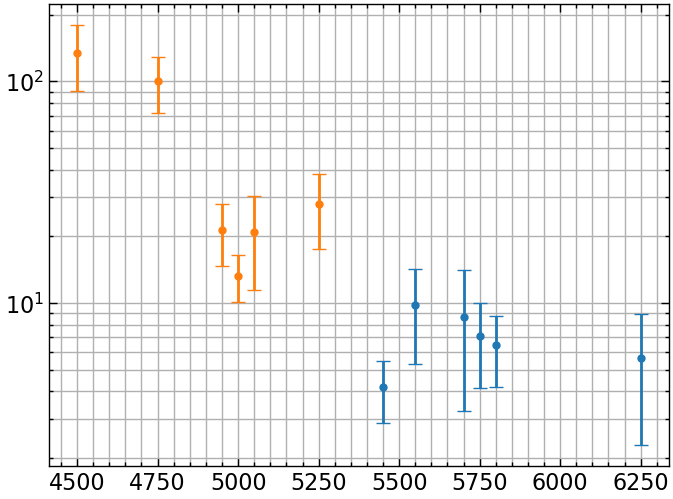

In [33]:
CN = ACs-ANs
dANCN = np.sqrt(dANs**2+dACs**2)
dCN = np.log(10)*10**CN*dANCN

for i in range(len(oisorats)):

    plt.errorbar(teffs2[i], 10**CN[i], yerr = dCN[i], fmt='o', capsize=5, ms=5, color=cs[i])
    print(names[i], 10**CN[i], dCN[i])
plt.yscale('log')
plt.grid(which='both')

In [9]:
model_an = props['log(N)_end']
model_rat = props['16O/18O']
model_f = 1/(1+model_rat)
model_ao = props['log(O)']
model_a18o = model_ao + np.log10(model_f)

NameError: name 'props' is not defined

In [116]:
ao18errs

array([0.09028625, 0.10140524, 0.11128302, 0.10931377, 0.12160368,
       0.11663863, 0.19789714, 0.22819693, 0.40114448, 0.54488471,
       0.20820229, 0.20551039])

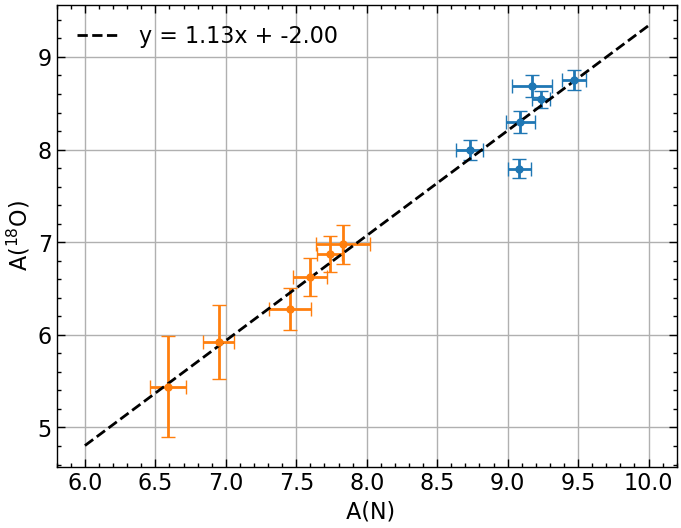

In [127]:
ao18errs = np.sqrt(dAOs**2 + (o18rat_errs/o18rats/np.log(10))**2)
ferr = 0.0
o18fes = np.log10(o18rats)+AOs
# ao18fe_errs = np.sqrt(dAOs**2 + (ferr)**2)
# nfe_errs = np.sqrt(dANs**2 + (ferr)**2)
# fig = plt.figure(figsize=(5, 4))
for i in range(len(oisorats)):
    # plt.text(teffs2[i]-10, oisorats[i]+1e-4, names[i], fontsize=8, ha='right', va='bottom')
    # plt.errorbar(teffs2[i], Acs[i], yerr=, fmt='o', capsize=5, ms=5, color=cs[i])
    # plt.scatter(teffs2[i], xNs[i]-xFes[i], c=cs[i], s = 30, marker = 'o')
    # plt.text(nfe+0.1, o18fe-0.2, names[i], fontsize=8, ha='left', va='top')
    plt.errorbar(ANs[i], o18fes[i], xerr=dANs[i], yerr=ao18errs[i], fmt='o', capsize=5, ms=5, color=cs[i])
    # swap axes

    # fit a straight line using polyfit
# plt.scatter(model_an - 7.5+1, model_a18o - 7.5, label = "Model predictions (T-500)")
# plt.plot(xs, yfit, 'k--')
# plt.yscale('log')

# plt.axhline(1, c='k', ls='--')
# plt.xlim(4300, 6300)


# plt.ylim(-5, 2)
# plt.xlim(-0.5, 2.5)

# plt.errorbar(9000, 10000, yerr=1, xerr = 1, fmt='o', capsize=5, ms=5, color="#FF7F0E", label = "RCB")
# plt.errorbar(9000, 10000, yerr=1, xerr = 1, fmt='o', capsize=5, ms=5, color="#1F77B4", label = "dLHdC")

plt.ylabel(r"A($^{18}$O)")
plt.xlabel(r" A(N)")

m, c = np.polyfit(ANs, o18fes, 1)
x = np.linspace(6,10, 100)
y = m*x + c
plt.plot(x, y, 'k--', label = f"y = {m:.2f}x + {c:.2f}")
plt.legend()


# plt.xscale('log')
plt.grid()
# plt.savefig("/media/advait/DATA/research/rcb-project/code/6692b5c2905d9ab9e6c1d723/images/nfe-v-o18fe.pdf", dpi=300)


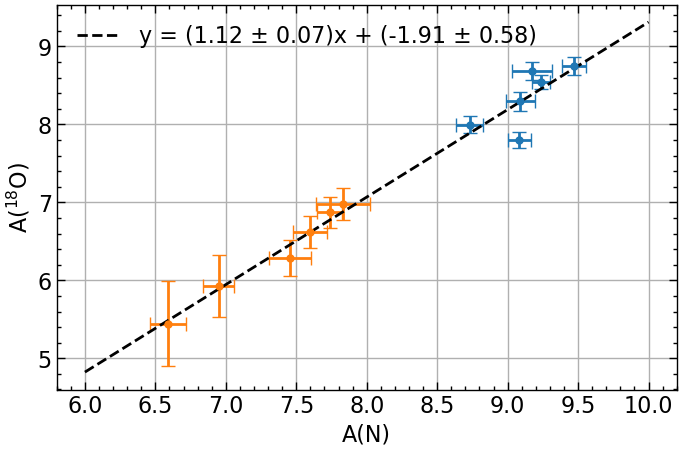

In [131]:
from scipy.optimize import curve_fit

ao18errs = np.sqrt(dAOs**2 + (o18rat_errs / o18rats / np.log(10))**2)
ferr = 0.0
o18fes = np.log10(o18rats) + AOs

# Define the linear model
def linear_model(x, a, b):
    return a * x + b

# Prepare data for fitting
x_data = ANs
y_data = o18fes
x_err = dANs
y_err = ao18errs

# Perform the fit, accounting for errors in y
popt, pcov = curve_fit(linear_model, x_data, y_data, sigma=y_err, absolute_sigma=True)

# Extract parameter errors from the covariance matrix
perr = np.sqrt(np.diag(pcov))

# Generate points for the fitted line
x_fit = np.linspace(6, 10, 100)
y_fit = linear_model(x_fit, *popt)

# Plot the original data with error bars
plt.figure(figsize=(8, 5))
for i in range(len(oisorats)):
    plt.errorbar(x_data[i], y_data[i], xerr=x_err[i], yerr=y_err[i], fmt='o', capsize=5, ms=5, color=cs[i])

# Plot the fitted line
plt.plot(x_fit, y_fit, 'k--', label=f"y = ({popt[0]:.2f} ± {perr[0]:.2f})x + ({popt[1]:.2f} ± {perr[1]:.2f})")

# Add labels and legend
plt.ylabel(r"A($^{18}$O)")
plt.xlabel(r"A(N)")
plt.legend()
plt.grid()

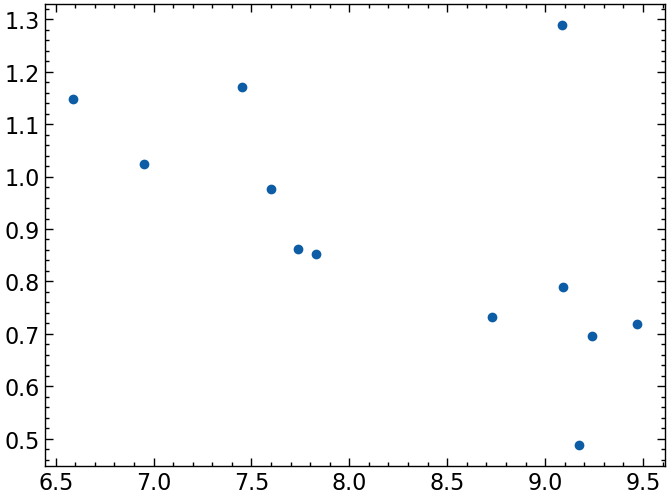

In [133]:
plt.plot(ANs, ANs - o18fes, 'o')

In [129]:
m, c

(np.float64(1.1334454023561196), np.float64(-1.9958878585477944))

In [35]:
# xCs = ACs - solar_abundances['C']
# xNs = ANs - solar_abundances['N']
# xOs = AOs - solar_abundances['O']
xCs = ACs #- solar_abundances['C']
xNs = ANs #- solar_abundances['N']
xOs = AOs #- solar_abundances['O']

In [36]:
xFes = results['[Fe]']

In [37]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

HD 137613 9.238 0.062
HD 182040 9.084 0.081
C38 9.469 0.084
A223 8.73 0.094
B566 9.089 0.102
B42 9.175 0.141
ASAS-RCB-21 7.736 0.086
NSV11154 7.454 0.151
AO Her 6.949 0.111
WISE J1942+ 6.59 0.13
ASAS-RCB-18 7.83 0.19
WISE J1818+ 7.6 0.121


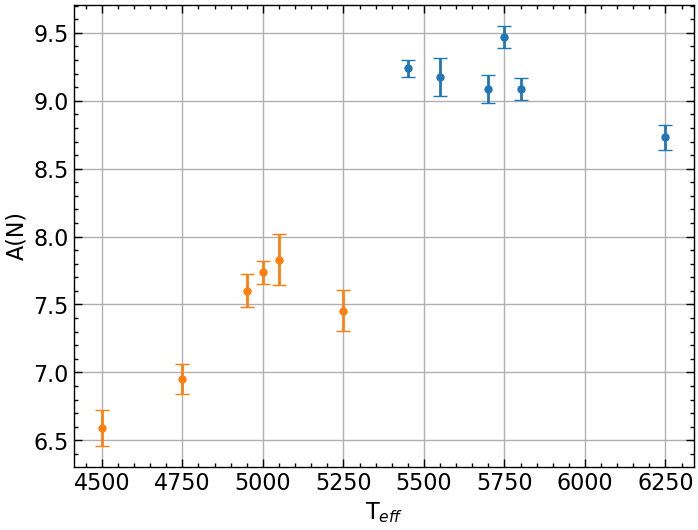

In [39]:
for i in range(len(oisorats)):
    # plt.text(teffs2[i]-10, oisorats[i]+1e-4, names[i], fontsize=8, ha='right', va='bottom')
    # plt.errorbar(teffs2[i], Acs[i], yerr=, fmt='o', capsize=5, ms=5, color=cs[i])
    # plt.scatter(teffs2[i], xNs[i]-xFes[i], c=cs[i], s = 30, marker = 'o')
    plt.errorbar(teffs[i], xNs[i], yerr=dANs[i], fmt='o', capsize=5, ms=5, color=cs[i])
    print(names[i], xNs[i], dANs[i])
    
# plt.yscale('log')

# plt.axhline(1, c='k', ls='--')
# plt.xlim(4300, 6300)
plt.xlabel(r"T$_{eff}$")
plt.ylabel(r"A(N)")
plt.grid()

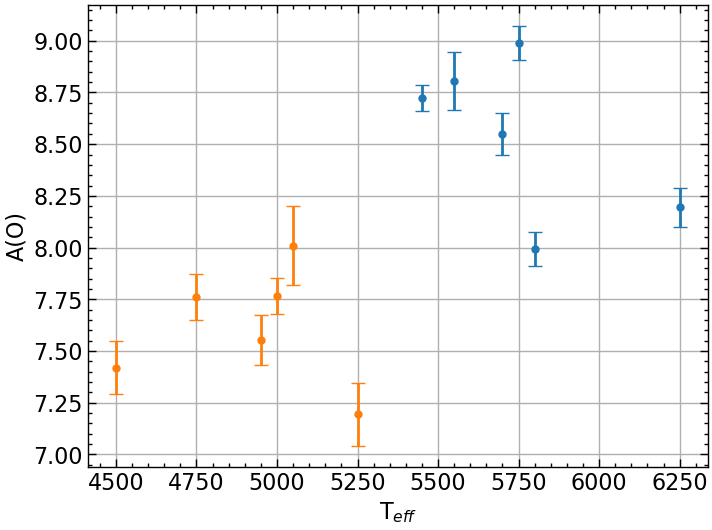

In [63]:
for i in range(len(oisorats)):
    # plt.text(teffs2[i]-10, oisorats[i]+1e-4, names[i], fontsize=8, ha='right', va='bottom')
    # plt.errorbar(teffs2[i], Acs[i], yerr=, fmt='o', capsize=5, ms=5, color=cs[i])
    # plt.scatter(teffs2[i], xNs[i]-xFes[i], c=cs[i], s = 30, marker = 'o')
    plt.errorbar(teffs[i], xOs[i], yerr=dANs[i], fmt='o', capsize=5, ms=5, color=cs[i])
    
# plt.yscale('log')

# plt.axhline(1, c='k', ls
#S  ='--')
# plt.xlim(4300, 6300)
plt.xlabel(r"T$_{eff}$")
plt.ylabel(r"A(O)")
plt.grid()

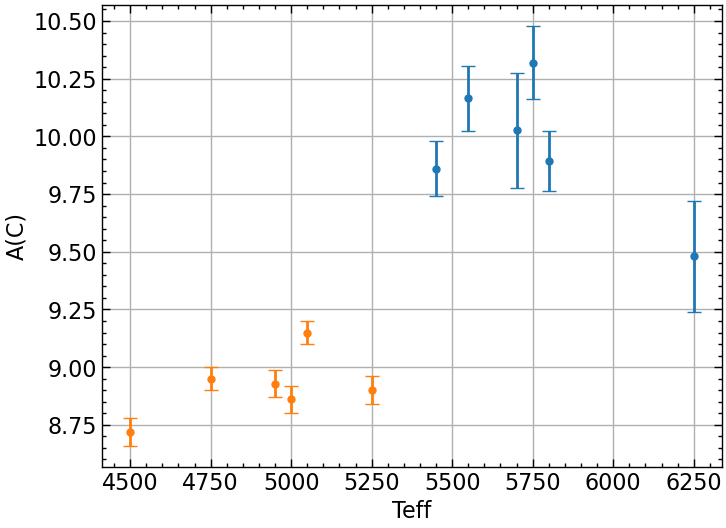

In [64]:
for i in range(len(oisorats)):
    # plt.text(teffs2[i]-10, oisorats[i]+1e-4, names[i], fontsize=8, ha='right', va='bottom')
    # plt.errorbar(teffs2[i], Acs[i], yerr=, fmt='o', capsize=5, ms=5, color=cs[i])
    plt.errorbar(teffs[i], xCs[i], yerr=dACs[i], fmt='o', capsize=5, ms=5, color=cs[i])
    # plt.errorbar(teffs2[i], xNs[i]-xFes[i], yerr=dANs[i], fmt='o', capsize=5, ms=5, color=cs[i])
    
# plt.yscale('log')

# plt.axhline(1, c='k', ls='--')
# plt.xlim(4300, 6300)
plt.xlabel("Teff")
plt.ylabel(r"A(C)")
plt.grid()

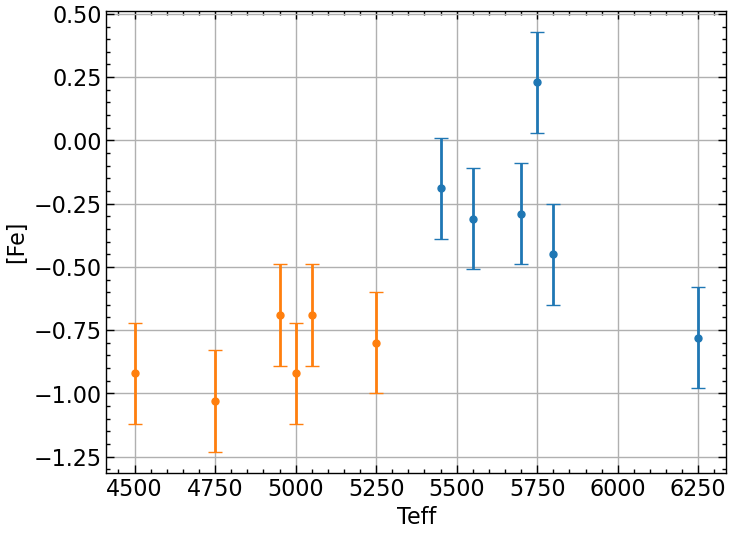

In [65]:
for i in range(len(oisorats)):
    # plt.text(teffs2[i]-10, oisorats[i]+1e-4, names[i], fontsize=8, ha='right', va='bottom')
    # plt.errorbar(teffs2[i], Acs[i], yerr=, fmt='o', capsize=5, ms=5, color=cs[i])
    # plt.scatter(teffs2[i], xFes[i], c=cs[i], s = 30, marker = 'o')
    plt.errorbar(teffs[i], xFes[i], yerr=0.2, fmt='o', capsize=5, ms=5, color=cs[i])
    # plt.errorbar(teffs2[i], xNs[i]-xFes[i], yerr=dANs[i], fmt='o', capsize=5, ms=5, color=cs[i])
    
# plt.yscale('log')

# plt.axhline(1, c='k', ls='--')
# plt.xlim(4300, 6300)
plt.xlabel("Teff")
plt.ylabel(r"[Fe]")
plt.grid()

In [13]:
xCs = ACs - solar_abundances['C']
xNs = ANs - solar_abundances['N']
xOs = AOs - solar_abundances['O']

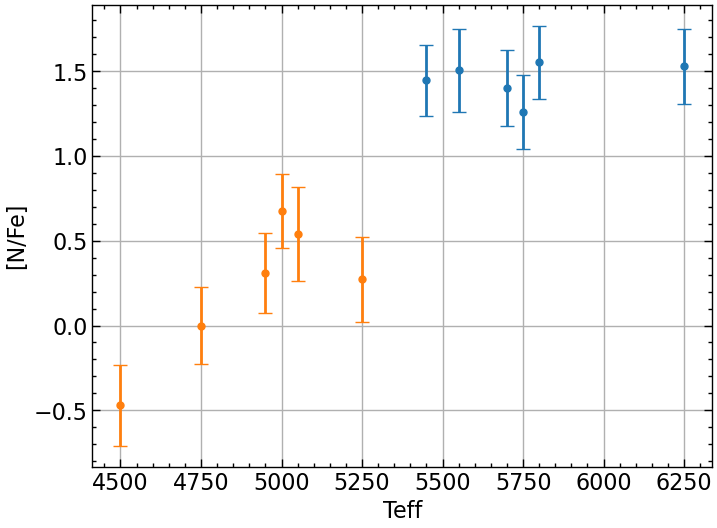

In [67]:
errs = np.sqrt(0.2**2 + dANs**2)
for i in range(len(oisorats)):
    # plt.text(teffs2[i]-10, oisorats[i]+1e-4, names[i], fontsize=8, ha='right', va='bottom')
    # plt.errorbar(teffs2[i], Acs[i], yerr=, fmt='o', capsize=5, ms=5, color=cs[i])
    # plt.scatter(teffs2[i], xNs[i]-xFes[i], c=cs[i], s = 30, marker = 'o')
    plt.errorbar(teffs2[i], xNs[i]-xFes[i], yerr=errs[i], fmt='o', capsize=5, ms=5, color=cs[i])
    
# plt.yscale('log')

# plt.axhline(1, c='k', ls='--')
# plt.xlim(4300, 6300)
plt.xlabel("Teff")
plt.ylabel(r"[N/Fe]")
plt.grid()

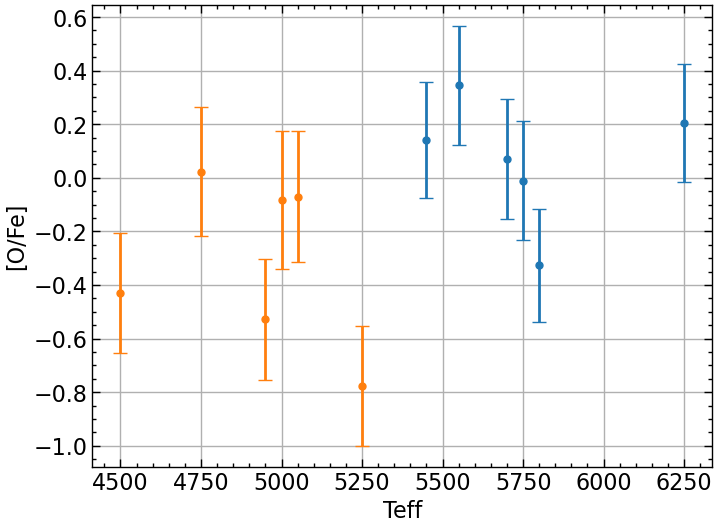

In [68]:
errs = np.sqrt(0.2**2 + dAOs**2)

for i in range(len(oisorats)):
    # plt.text(teffs2[i]-10, oisorats[i]+1e-4, names[i], fontsize=8, ha='right', va='bottom')
    # plt.errorbar(teffs2[i], Acs[i], yerr=, fmt='o', capsize=5, ms=5, color=cs[i])
    # plt.scatter(teffs2[i], xNs[i]-xFes[i], c=cs[i], s = 30, marker = 'o')
    plt.errorbar(teffs2[i], xOs[i]-xFes[i], yerr=errs[i], fmt='o', capsize=5, ms=5, color=cs[i])
    
# plt.yscale('log') 

# plt.axhline(1, c='k', ls='--')
# plt.xlim(4300, 6300)
plt.xlabel("Teff")
plt.ylabel(r"[O/Fe]")
plt.grid()

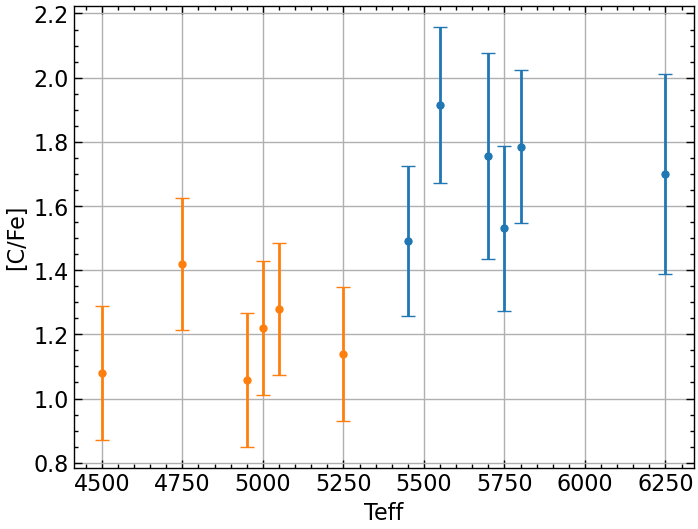

In [69]:
errs = np.sqrt(0.2**2 + dACs**2)

for i in range(len(oisorats)):
    # plt.text(teffs2[i]-10, oisorats[i]+1e-4, names[i], fontsize=8, ha='right', va='bottom')
    # plt.errorbar(teffs2[i], Acs[i], yerr=, fmt='o', capsize=5, ms=5, color=cs[i])
    # plt.scatter(teffs2[i], xNs[i]-xFes[i], c=cs[i], s = 30, marker = 'o')
    plt.errorbar(teffs2[i], xCs[i]-xFes[i], yerr=errs[i], fmt='o', capsize=5, ms=5, color=cs[i])
    
# plt.yscale('log') 

# plt.axhline(1, c='k', ls='--')
# plt.xlim(4300, 6300)
plt.xlabel("Teff")
plt.ylabel(r"[C/Fe]")
plt.grid()

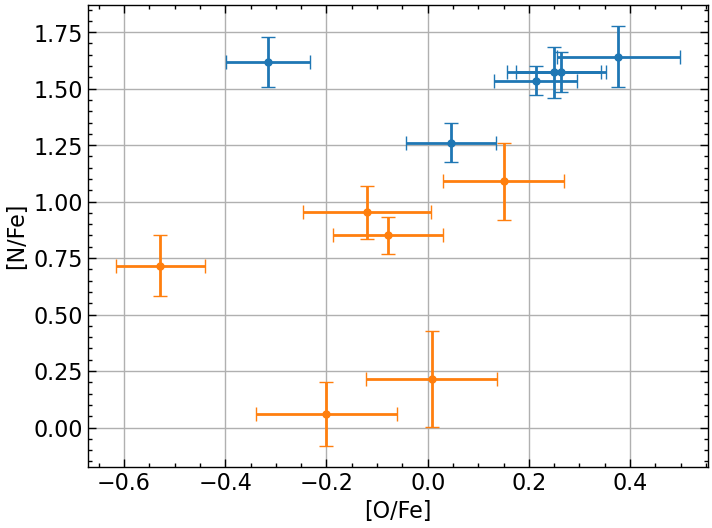

In [103]:
for i in range(len(oisorats)):
    # plt.text(teffs2[i]-10, oisorats[i]+1e-4, names[i], fontsize=8, ha='right', va='bottom')
    # plt.errorbar(teffs2[i], Acs[i], yerr=, fmt='o', capsize=5, ms=5, color=cs[i])
    # plt.scatter(teffs2[i], xNs[i]-xFes[i], c=cs[i], s = 30, marker = 'o')
    plt.errorbar(xOs[i]-xFes[i], xNs[i]-xFes[i], yerr=dANs[i], xerr=dAOs[i], fmt='o', capsize=5, ms=5, color=cs[i])
    # fit a straight line using polyfit

x = oisorats
y = xNs-xFes
p = np.polyfit(x, y, 1)
xs = np.linspace(np.min(oisorats), np.max(oisorats), 100)
yfit = np.polyval(p, xs)
# plt.plot(xs, yfit, 'k--')
# plt.yscale('log')

# plt.axhline(1, c='k', ls='--')
# plt.xlim(4300, 6300)
plt.xlabel(r"[O/Fe]")
plt.ylabel(r"[N/Fe]")
# plt.xscale('log')
plt.grid()

In [14]:
xFes = results['[Fe]'] 
xNas = results['[Na]']
xMgs = results['[Mg]']
xCas = results['[Ca]']
xSs = results['[S]']
xSis = results['[Si]']
xCs = ACs - solar_abundances['C']
xNs = ANs - solar_abundances['N']
xOs = AOs - solar_abundances['O']

In [15]:
# iterate over all 5 elements and plot them against each other
elenames = ['C', 'N', 'O', 'Na', 'Mg', 'Ca', 'S', 'Si']
xelements = [xCs, xNs, xOs, xNas, xMgs, xCas, xSs, xSis]

In [16]:
len(xelements)

8

In [17]:
for j in range(len(xelements)):
    element = xelements[j]
    plt.figure()
    for i in range(len(oisorats)):
        plt.text(xFes[i] + 0.04, element[i] - 0.02, names[i], fontsize=8, ha='left', va='top')
        plt.scatter(xFes[i], element[i], c=cs[i], s=30, marker='o')
    plt.scatter(0, 0, c='k', marker='+', s=480)
    
    # Set labels
    plt.ylabel(fr"[{elenames[j]}]")
    plt.xlabel(r"[Fe]")
    
    # Set aspect ratio to be equal
    plt.gca().set_aspect('equal')
    # plt.ylim(-1.5, 0.8)
    # Adjust axes limits to make them equal
    xspan = plt.xlim()[1] - plt.xlim()[0]
    yspan = plt.ylim()[1] - plt.ylim()[0]
    print(elenames[j], xspan, yspan)
    if xspan < yspan:
        plt.xlim(plt.xlim()[0], plt.xlim()[0] + yspan)
    else:
        plt.ylim(plt.ylim()[0], plt.ylim()[0] + xspan)
    
    # Draw a line y = x passing through the origin without modifying the axes limits
    plt.gca().axline((0, 0), slope=1, linestyle='--', color='k')
    
    # Add grid
    plt.grid()
    
    # Show plot
    plt.show()

NameError: name 'oisorats' is not defined

<Figure size 800x600 with 0 Axes>

In [23]:
len(xelements)

8

In [28]:
plt.style.use('default')
plt.style.use('science')
plt.style.use('nature')

C 1.826 2.1999999999999993
N 1.826 3.6068999999999996
O 1.826 2.4156000000000013
Na 1.826 3.0469999999999997
Mg 1.826 2.761
Ca 1.826 2.42
S 1.826 1.617
Si 1.826 2.024


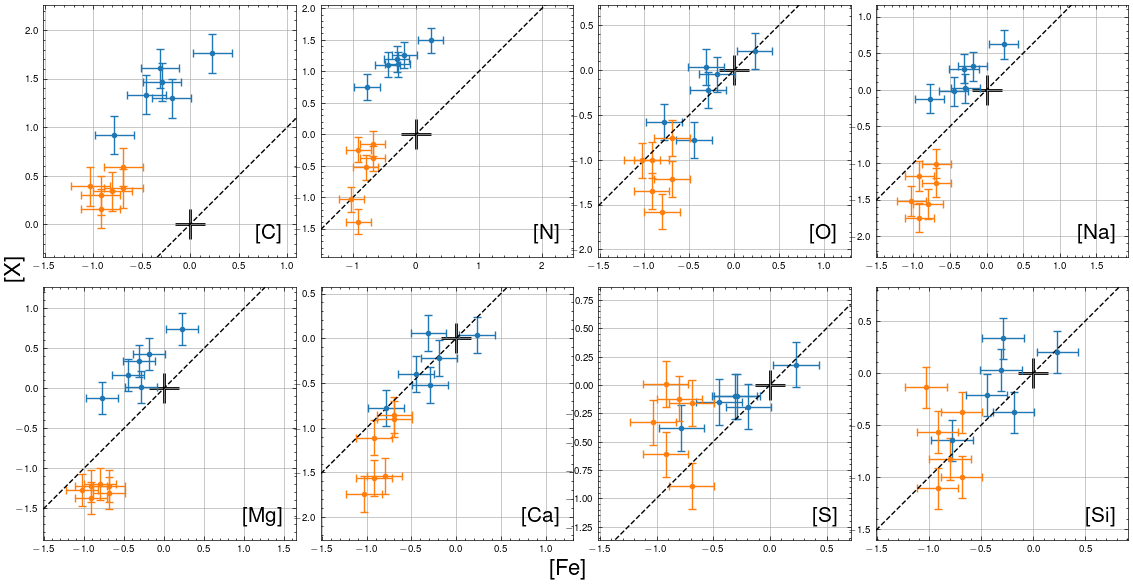

In [58]:
fig, axes = plt.subplots(2,4, figsize=(14, 7))
axes = axes.flatten()

for j in range(len(xelements)):
    element = xelements[j]
    ax = axes[j]
    for i in range(len(oisorats)):
        # ax.text(xFes[i] + 0.04, element[i] - 0.02, names[i], fontsize=8, ha='left', va='top')
        # ax.scatter(xFes[i], element[i], c=cs[i], s=30, marker='o')
        ax.errorbar(xFes[i], element[i], xerr = .2, yerr = 0.2,  c=cs[i], ms=3, marker='o', capsize = 3)
    ax.scatter(0, 0, c='k', marker='+', s=480, linewidths=2)
    
    # Set labels
    # ax.set_ylabel(fr"[{elenames[j]}]")
    ax.text(0.95, 0.05, fr"[{elenames[j]}]", ha='right', va='bottom', transform=ax.transAxes, fontsize = 15)
    # ax.set_xlabel(r"[Fe]")
    
    # Set aspect ratio to be equal
    ax.set_aspect('equal')
    
    # Adjust axes limits to make them equal
    xspan = ax.get_xlim()[1] - ax.get_xlim()[0]
    yspan = ax.get_ylim()[1] - ax.get_ylim()[0]
    print(elenames[j], xspan, yspan)
    if xspan < yspan:
        ax.set_xlim(ax.get_xlim()[0]-0.2, ax.get_xlim()[0] + yspan + 0.2)
        ax.set_ylim(ax.get_ylim()[0]-0.2, ax.get_ylim()[1] + 0.2)
    else:
        ax.set_ylim(ax.get_ylim()[0]-0.2, ax.get_ylim()[0] + xspan+ 0.2)
        ax.set_xlim(ax.get_xlim()[0]-0.2, ax.get_xlim()[1]+ 0.2)
    
    # Draw a line y = x passing through the origin without modifying the axes limits
    ax.axline((0, 0), slope=1, linestyle='--', color='k')
    
    # Add grid
    ax.grid()
fig.text(0.5, 0.07, r"[Fe]", ha='center', va='center', fontsize=16)  # X-axis label
fig.text(0.105, 0.5, r"[X]", ha='center', va='center', rotation='vertical', fontsize=16)  # Y-axis label
# Adjust layout
plt.subplots_adjust(wspace=0.1, hspace=0.1)
# plt.tight_layout()

# Show plot
# plt.show()
plt.savefig("/media/advait/DATA/research/rcb-project/code/6692b5c2905d9ab9e6c1d723/images/fe-v-elements.pdf", dpi=300)

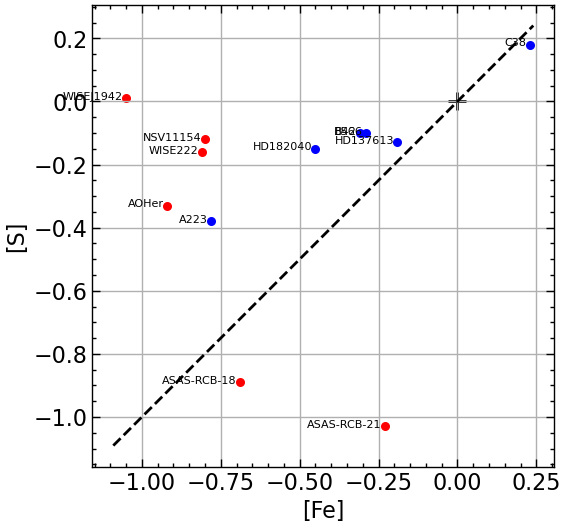

In [143]:
for i in range(len(oisorats)):
    plt.text(xFes[i]-0.01, xSs[i]-0.01, names[i], fontsize=8, ha='right', va='bottom')
    # plt.errorbar(teffs2[i], Acs[i], yerr=, fmt='o', capsize=5, ms=5, color=cs[i])
    plt.scatter(xFes[i], xSs[i], c=cs[i], s = 30, marker = 'o')
    
    # plt.errorbar(np.log(o18rats[i])+xOs[i]-xFes[i], xNs[i]-xFes[i], yerr=dANs[i], xerr=ao18errs[i], fmt='o', capsize=5, ms=5, color=cs[i])
    # plt.errorbar(np.log(1-o18rats[i])+xOs[i]-xFes[i], xNs[i]-xFes[i], yerr=dANs[i], xerr=dAOs[i], fmt='o', capsize=5, ms=5, color=cs[i])

    # fit a straight line using polyfit

# plt.plot(xs, yfit, 'k--')
# plt.yscale('log')

# plt.axhline(1, c='k', ls='--')
# plt.xlim(4300, 6300)
plt.scatter(0,0, c = 'k', marker='+', s= 180)
# make a straight line x=y extending to the axes limits and passing through origin
plt.plot(plt.ylim(), plt.ylim(), 'k--')
# plt.xlabel(r"[Fe]")
plt.ylabel(r"[S]")
plt.xlabel(r"[Fe]")
plt.gca().set_aspect('equal')
# plt.xscale('log')
plt.grid()